# DATA SET AND SCHEMA

This dataset a list of video games with sales greater than 100,000 copies it was  generated by a scrape of vgchart.com

Fields include

.Rank-Ranking of overall sales

.Name-The games name

.Platform-Platform of the games release

.Year-Year of the game's release

.Genre-Genre of the game

 Publisher - Publisher of the game


 NA_Sales - Sales in North America (in millions)


 EU_Sales - Sales in Europe (in millions)


 JP_Sales - Sales in Japan (in millions)


 Other_Sales - Sales in the rest of the world (in millions)


 Global_Sales - Total worldwide sales

# Problem Statement

##### -Perform Sales Analysis On Video Games Sales Date


##### -Sales Trends Games and Platforms


##### -Top-selling Gamesand Platforms


-Genre Analysis

In [84]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [85]:
vgals=pd.read_csv(r'C:\Users\femif\Downloads\vgsales.csv\vgsales.csv')
vgals

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Genre Analysing

1.Analyzing the popularity of different game geners

In [86]:
genre_sales = vgals.groupby('Genre')['Global_Sales'].sum()
genre_sales

Genre
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Global_Sales, dtype: float64

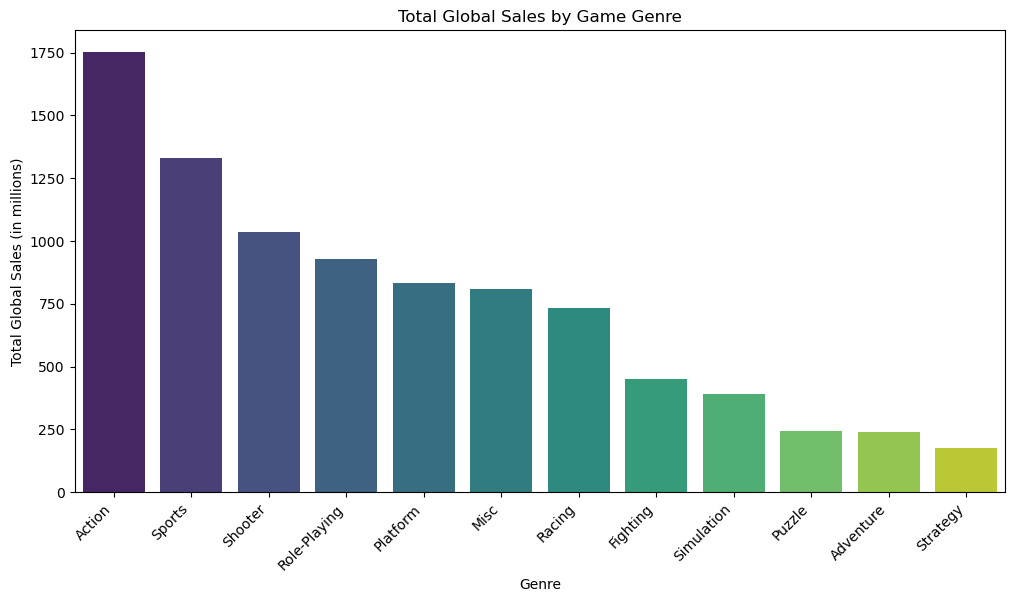

In [87]:
genre_sales = vgals.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')
plt.title('Total Global Sales by Game Genre')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.show()

2.Comparing sales performance across geners

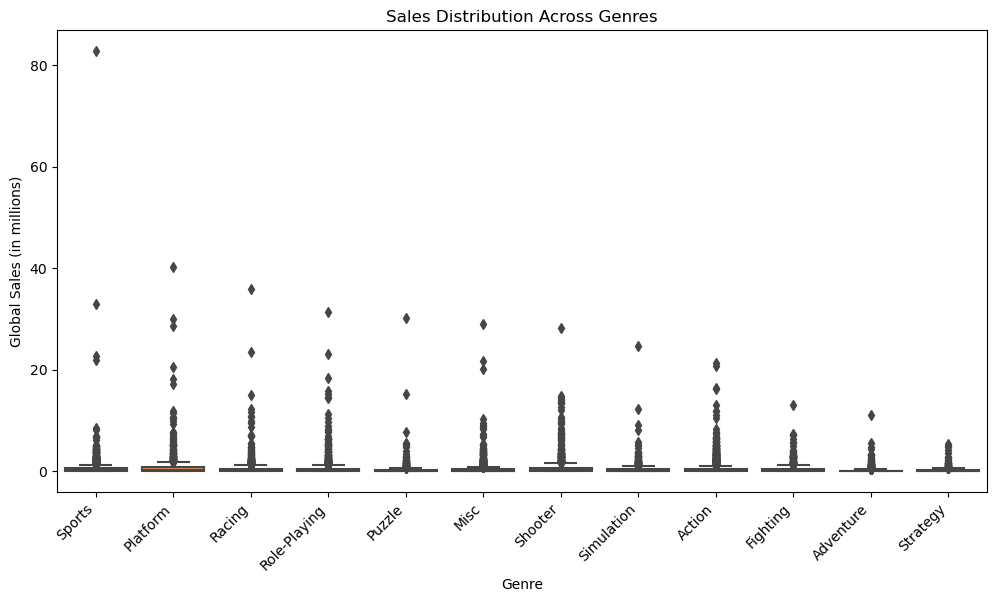

In [88]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=vgals)
plt.title('Sales Distribution Across Genres')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Regional Analysis

1.Examing Sales data based on regions or countries

In [89]:
region_sales = vgals[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales

NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64

In [90]:
region_sales

NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64

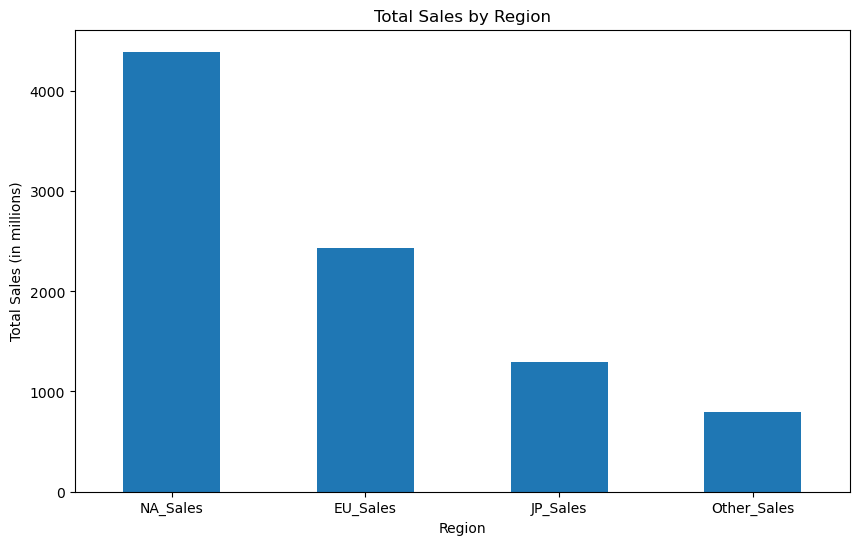

In [91]:
region_sales = vgals[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=0)
plt.show()

2.identifying regional perference in terms of games generes or platforms

In [92]:
vgals['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [93]:
platform_region = vgals.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
platform_region

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,90.60,5.47,0.00,0.91
3DO,0.00,0.00,0.10,0.00
3DS,78.87,58.52,97.35,12.63
DC,5.43,1.69,8.56,0.27
DS,390.71,194.65,175.57,60.53
GB,114.32,47.82,85.12,8.20
GBA,187.54,75.25,47.33,7.73
GC,133.46,38.71,21.58,5.18
GEN,19.27,5.52,2.67,0.89


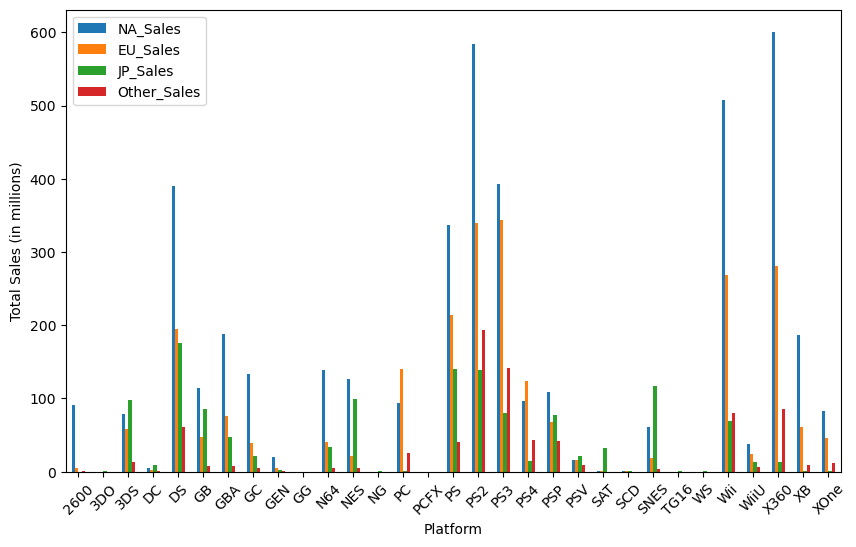

In [94]:
platform_region = vgals.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
platform_region.plot(kind='bar',figsize=(10, 6))

plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()


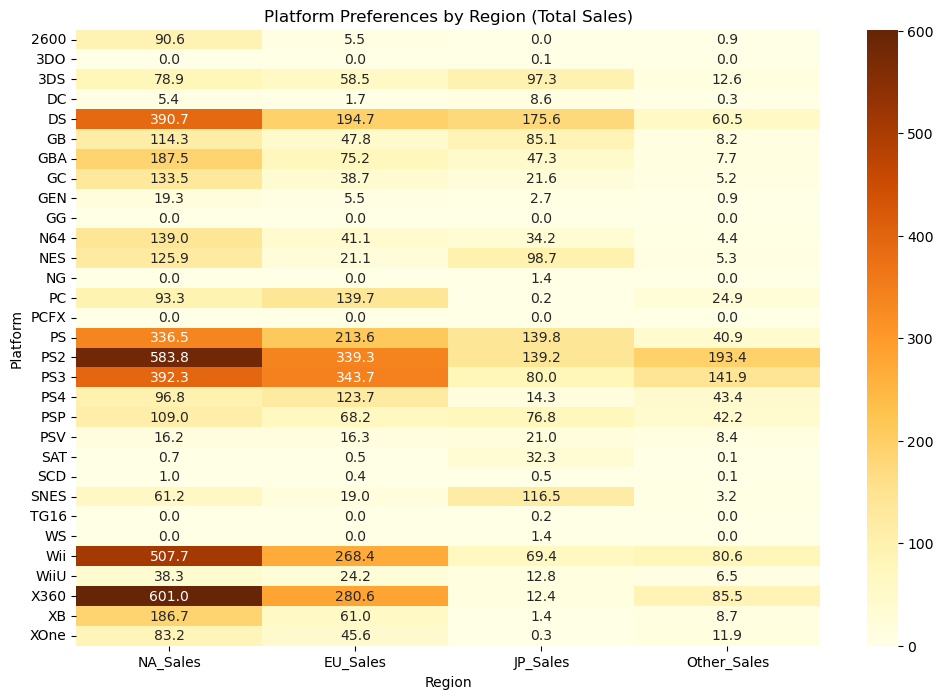

In [95]:
platform_region = vgals.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
plt.figure(figsize=(12, 8))
sns.heatmap(platform_region, annot=True, fmt='.1f', cmap='YlOrBr')
plt.title('Platform Preferences by Region (Total Sales)')
plt.xlabel('Region')
plt.ylabel('Platform')
plt.show()

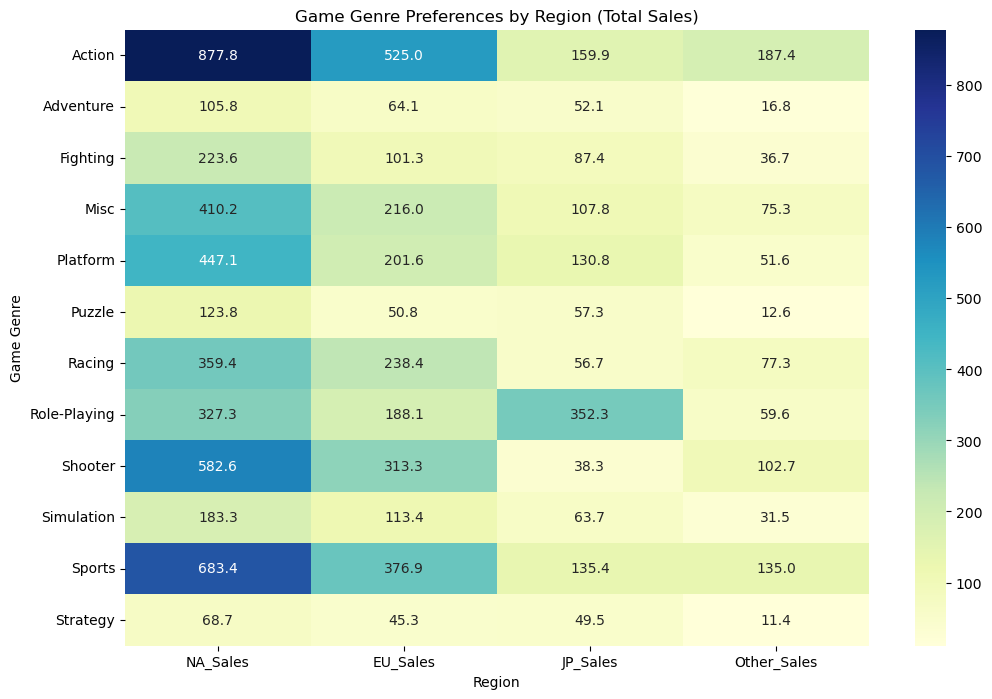

In [96]:
genre_region = vgals.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
plt.figure(figsize=(12, 8))
sns.heatmap(genre_region, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Game Genre Preferences by Region (Total Sales)')
plt.xlabel('Region')
plt.ylabel('Game Genre')
plt.show()

#### Market Share Analysis

1.Analysing the market share of major game Publishers

In [97]:
vgals['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

In [98]:
vgals.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [63]:
publisher = vgals.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
publisher 

Publisher
Nintendo                                  1786.56
Electronic Arts                           1110.32
Activision                                 727.46
Sony Computer Entertainment                607.50
Ubisoft                                    474.72
Take-Two Interactive                       399.54
THQ                                        340.77
Konami Digital Entertainment               283.64
Sega                                       272.99
Namco Bandai Games                         254.09
Microsoft Game Studios                     245.79
Capcom                                     200.89
Atari                                      157.22
Warner Bros. Interactive Entertainment     153.89
Square Enix                                145.18
Disney Interactive Studios                 119.96
Eidos Interactive                           98.98
LucasArts                                   87.34
Bethesda Softworks                          82.14
Midway Games                            

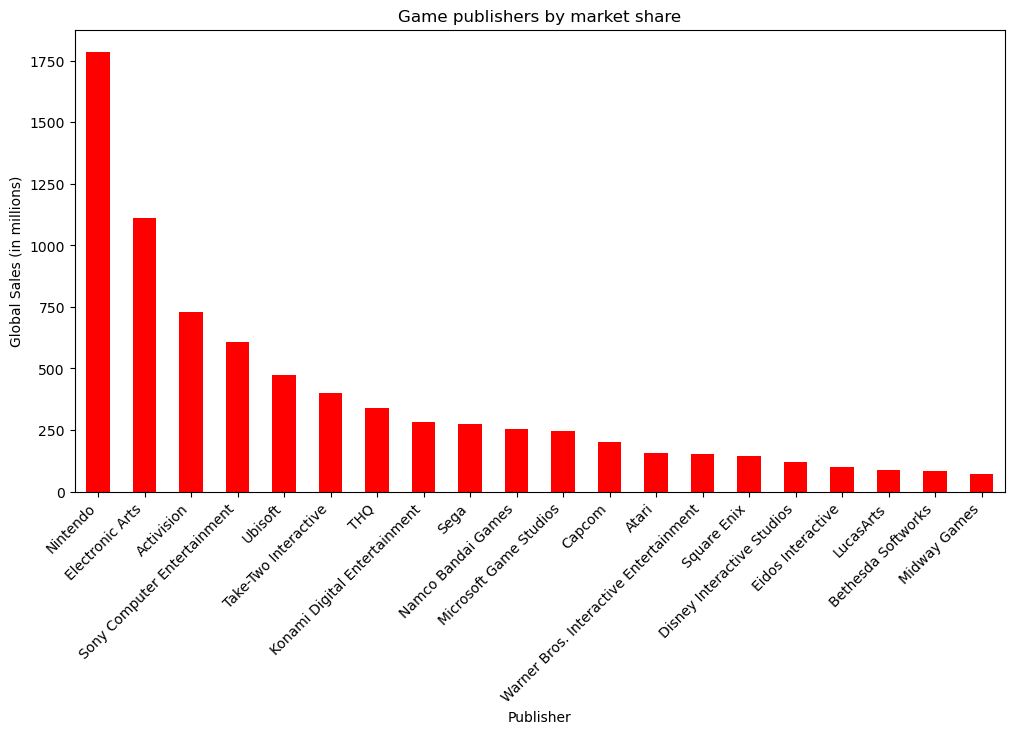

In [64]:
plt.figure(figsize=(12, 6))
publisher.plot(kind='bar',color='red')
plt.title('Game publishers by market share')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.show()



###### 2.Identifying emerging publishers or trends

In [66]:
df=vgals['Year']
df

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 16598, dtype: float64

In [73]:
recent_years = vgals[vgals['Year'] >= 1980]
emerging_publishers = recent_years.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(50)
emerging_publishers

Publisher
Nintendo                                  1784.43
Electronic Arts                           1093.39
Activision                                 721.41
Sony Computer Entertainment                607.28
Ubisoft                                    473.54
Take-Two Interactive                       399.30
THQ                                        340.44
Konami Digital Entertainment               278.56
Sega                                       270.70
Namco Bandai Games                         253.65
Microsoft Game Studios                     245.79
Capcom                                     199.95
Atari                                      146.77
Square Enix                                144.73
Warner Bros. Interactive Entertainment     142.34
Disney Interactive Studios                 118.76
Eidos Interactive                           96.75
LucasArts                                   84.95
Bethesda Softworks                          81.53
Midway Games                            

In [74]:
vgals['Year'].min()

1980.0

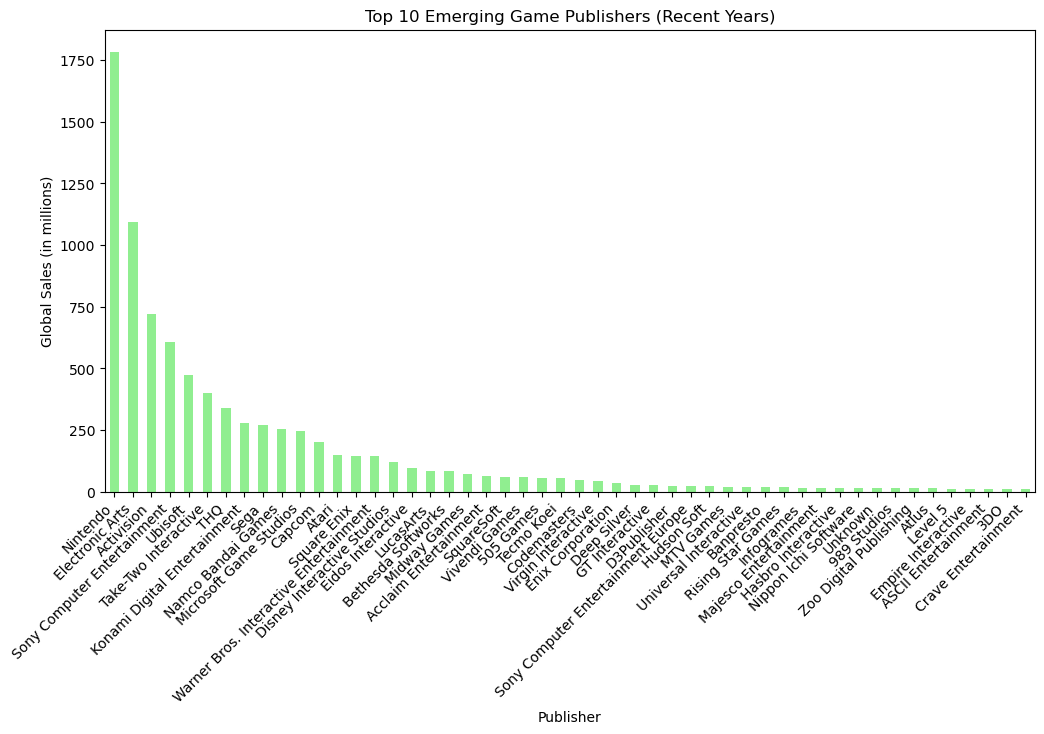

In [75]:
plt.figure(figsize=(12, 6))
emerging_publishers.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Emerging Game Publishers (Recent Years)')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.show()